# Titanic Survival Prediction 

**Link** -> https://www.kaggle.com/competitions/titanic/overview


## Objective

> Build a machine learning model which predicts the survival of passengers in the titanic shipwreck

In [16]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf


# For training the model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler



# For evaluating
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

## Importing the data

## Information about the Dataset


* Survival: Whether a passenger survived or not (0 or 1)
* Pclass: The socio-ecomonic class
  Upper: 1
  Middle: 2
  Lower: 3
* Sex: Gender of the passenger (Male or Female)
* Age: Age in years (Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5)

* SibSp: Number of siblings / spouses aboard the Titanic
* Parch: Number of parents / children aboard the Titanic
* Ticket: Ticket number
* Fare: Passenger fare
* Cabin: Cabin number
* Embarked: Port of Embarkation
  * C: Cherbourg
  * Q: Queenstown
  * S: Southampton


In [15]:
titanic_train= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic_dataset/train.csv')
titanic_test= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic_dataset/test.csv')
titanic_train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic_train.shape

(891, 12)

In [20]:
gender=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic_dataset/gender_submission.csv')
gender[:5]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [21]:
gender.shape

(418, 2)

In [22]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
titanic_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [24]:
titanic_train.shape

(891, 12)

In [25]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


>From the **.info()** and **.describe()** it it clear that **Age**, **Cabin** and **Embarked** have some missing values.

> We need to change the Dtype of **Sex** and **Embarked**

> We do not need the **Name**, **Cabin**, **Ticket** as they are not that of an important features.

### Converting Sex and Embarked columns to category types

In [27]:
attribs=['Sex', 'Embarked']

def convert_col(df, attr):
  for col in attr:
    df[col]= df[col].astype('category')
    

In [28]:
convert_col(titanic_train, attribs)
convert_col(titanic_test, attribs)

### Count of missing values

In [29]:
def count_na(df, col):
    print(f"Null values in {col}: ", df[col].isna().sum())
    
count_na(titanic_train, "Age")
count_na(titanic_train, "Cabin")
count_na(titanic_train, "Embarked")

Null values in Age:  177
Null values in Cabin:  687
Null values in Embarked:  2


### Visualizing the data

#### Survived Column

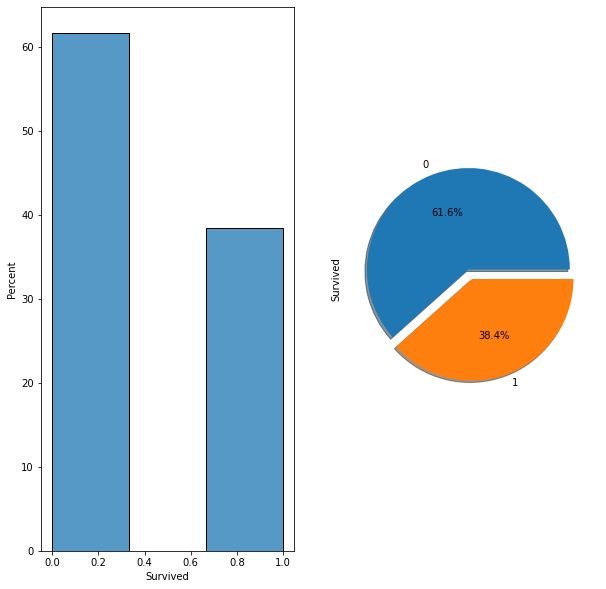

In [30]:
fig, ax= plt.subplots(1, 2, figsize=(10,10))

sns.histplot(data=titanic_train, x="Survived", stat="percent", bins=3, multiple="stack", ax=ax[0])
titanic_train['Survived'].value_counts().plot.pie(explode=[0.1,0], autopct="%1.1f%%", shadow=True, ax=ax[1])

plt.show()

#### Observation

* Less than(<) 0.5 -> Did not survive(0)
* Greater than (>) 0.5 -> Survived(1)

> Only 38.4% of the total titanic ship population survived.

#### Sex Column

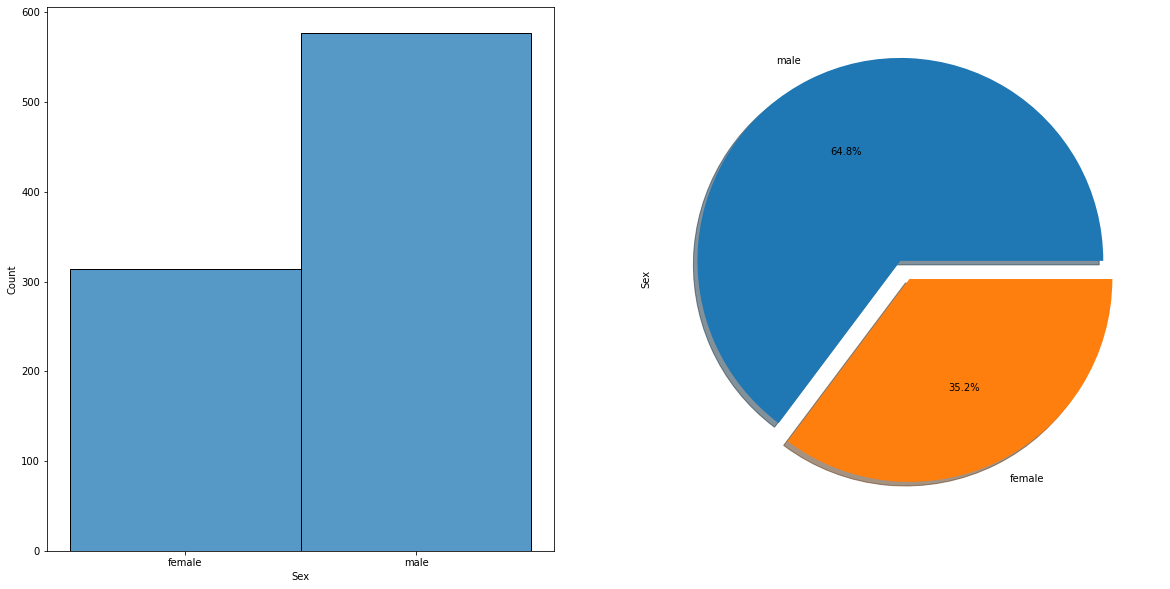

In [31]:
fig1, ax1= plt.subplots(1, 2, figsize=(20,10))

sns.histplot(data=titanic_train, x="Sex", ax=ax1[0])
titanic_train['Sex'].value_counts().plot.pie(explode=[0.1,0], autopct="%1.1f%%", shadow=True, ax=ax1[1])

plt.show()

* **64.8%** are Male
* **35.2%** are Female

#### Pclass Column

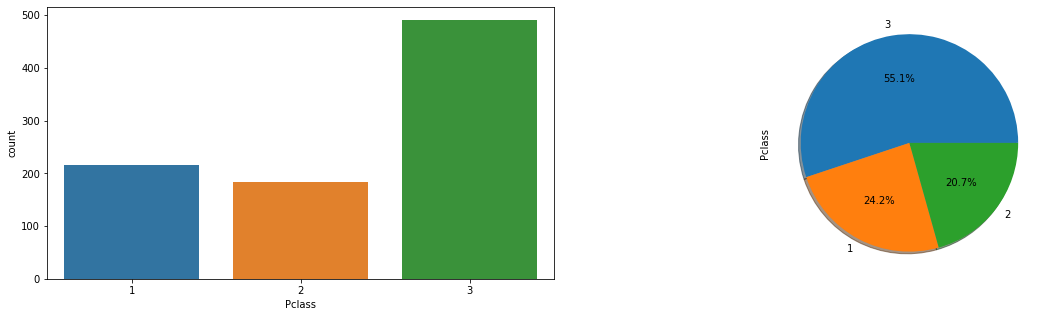

In [32]:
fig2, ax2= plt.subplots(1,2, figsize=(20,5))

sns.countplot(data=titanic_train, x="Pclass", ax=ax2[0])
titanic_train['Pclass'].value_counts().plot.pie(shadow=True, autopct="%1.1f%%", ax=ax2[1])

plt.show()

#### Age Column

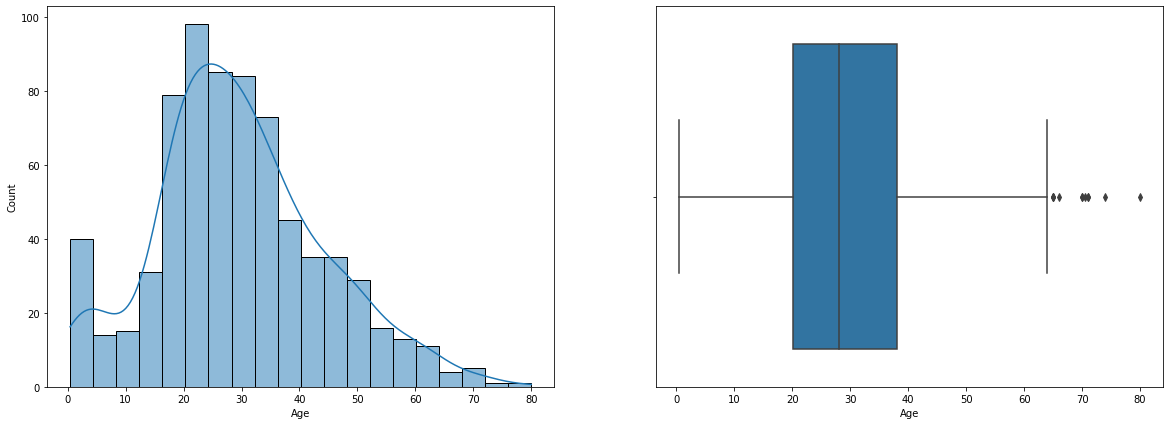

In [33]:
fig3, ax3 = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=titanic_train, x="Age", ax=ax3[0], kde=True)
sns.boxplot(data=titanic_train, x="Age", ax=ax3[1])

plt.show()

#### Fare Column

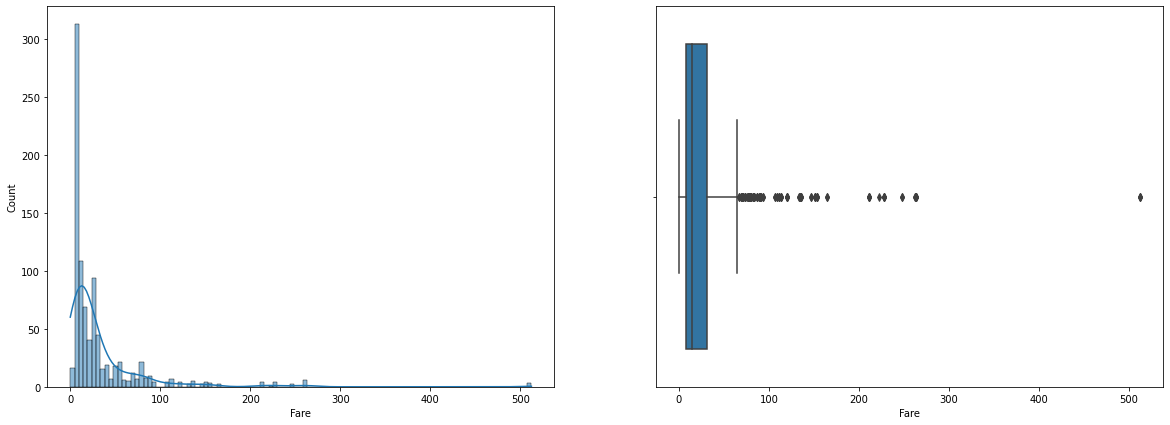

In [34]:
fig4, ax4 = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=titanic_train, x="Fare", ax=ax4[0], kde=True)
sns.boxplot(data=titanic_train, x="Fare", ax=ax4[1])

plt.show()

In [35]:
max_fare, min_fare = titanic_train["Fare"].max(), titanic_train["Fare"].min()

print(f"Number of passengers who paid ${min_fare}: ", titanic_train[titanic_train["Fare"] == min_fare].shape[0])
print(f"Number of passengers who paid ${max_fare}: ", titanic_train[titanic_train["Fare"] == max_fare].shape[0])
print(f"Fare given by maximum number of passengers: $", list(dict(titanic_train["Fare"].value_counts()).keys())[0])

Number of passengers who paid $0.0:  15
Number of passengers who paid $512.3292:  3
Fare given by maximum number of passengers: $ 8.05


In [36]:
titanic_train[titanic_train['Fare'] == min_fare]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [37]:
titanic_train[titanic_train['Fare'] == max_fare]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [38]:
(titanic_train[titanic_train['Fare'] == min_fare]).count()

PassengerId    15
Survived       15
Pclass         15
Name           15
Sex            15
Age             7
SibSp          15
Parch          15
Ticket         15
Fare           15
Cabin           3
Embarked       15
dtype: int64

#### Embarked Column

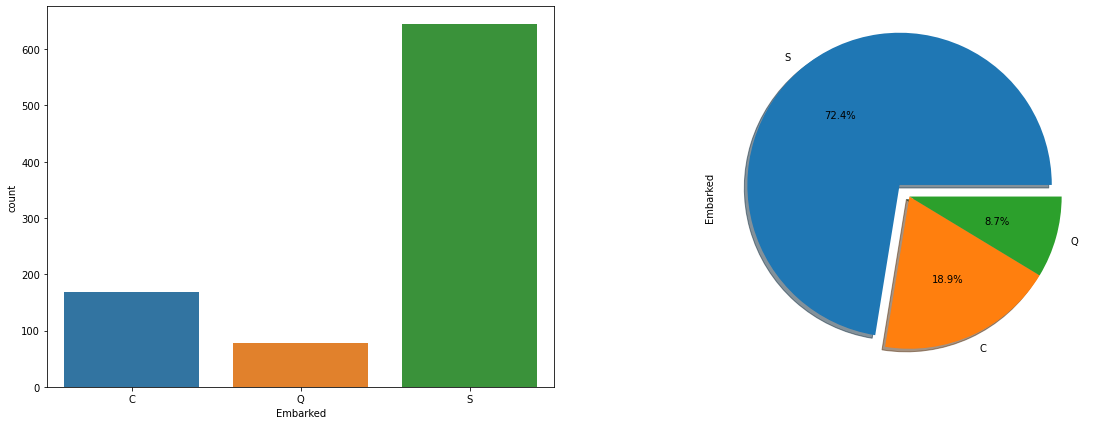

In [39]:
fig5, ax5 = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=titanic_train, x="Embarked", ax=ax5[0])
titanic_train["Embarked"].value_counts().plot.pie(ax=ax5[1], autopct="%1.1f%%",
                                          explode=(0.1, 0, 0), shadow=True)

plt.show()

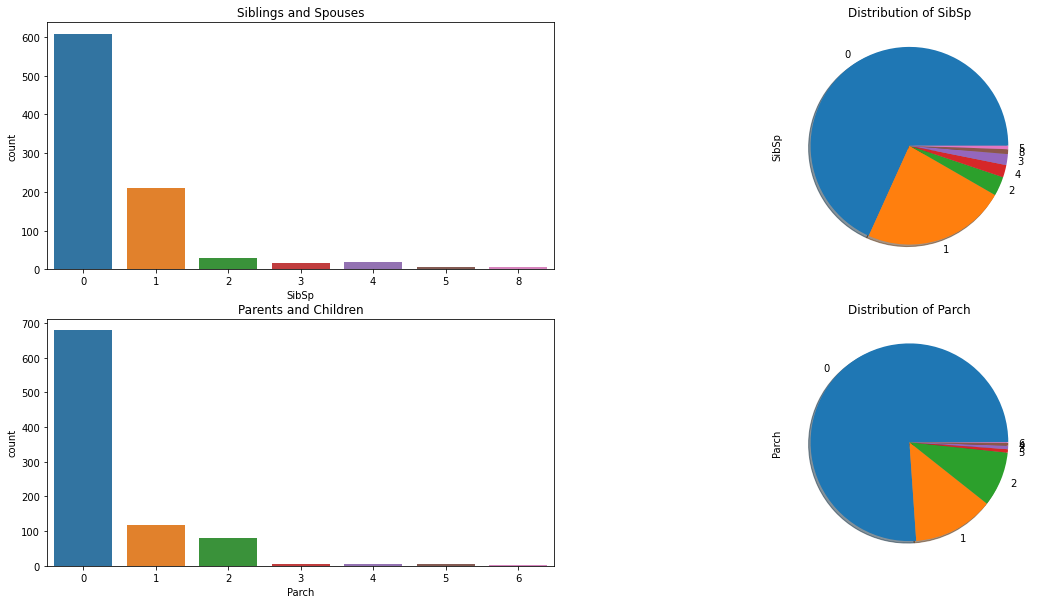

In [40]:
fig6, ax6 = plt.subplots(2, 2, figsize=(20, 10))

# SibSp
sns.countplot(data=titanic_train, x="SibSp", ax=ax6[0, 0]).set_title("Siblings and Spouses")
titanic_train["SibSp"].value_counts().plot.pie(ax=ax6[0, 1], shadow=True, title="Distribution of SibSp")

# Parch
sns.countplot(data=titanic_train, x="Parch", ax=ax6[1, 0]).set_title("Parents and Children")
titanic_train["Parch"].value_counts().plot.pie(ax=ax6[1, 1], shadow=True, title="Distribution of Parch")

#### Visualizing Survivals Column with Pclass

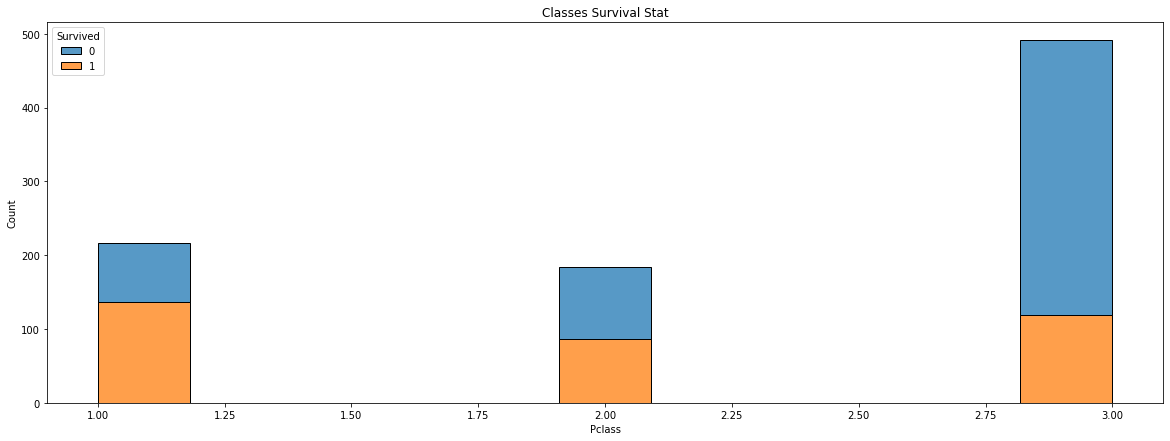

In [41]:
fig, ax = plt.subplots(figsize=(20, 7))

sns.histplot(data=titanic_train, x="Pclass", hue="Survived", multiple="stack", ax=ax).set_title("Classes Survival Stat")
plt.show()

In [42]:
sur_upper = titanic_train[(titanic_train["Survived"] == 1) & (titanic_train["Pclass"] == 1)]
sur_middle = titanic_train[(titanic_train["Survived"] == 1) & (titanic_train["Pclass"] == 2)]
sur_lower = titanic_train[(titanic_train["Survived"] == 1) & (titanic_train["Pclass"] == 3)]

print("Upper class survival: ", sur_upper)
print("Middle class survival: ", sur_middle)
print("Lower class survival: ", sur_lower)

Upper class survival:       PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
11            12         1       1   
23            24         1       1   
31            32         1       1   
..           ...       ...     ...   
862          863         1       1   
871          872         1       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
..                                            

In [43]:
sur_upper = titanic_train[(titanic_train["Survived"] == 1) & (titanic_train["Pclass"] == 1)].shape[0]
sur_middle = titanic_train[(titanic_train["Survived"] == 1) & (titanic_train["Pclass"] == 2)].shape[0]
sur_lower = titanic_train[(titanic_train["Survived"] == 1) & (titanic_train["Pclass"] == 3)].shape[0]

print("Upper class survival: ", sur_upper)
print("Middle class survival: ", sur_middle)
print("Lower class survival: ", sur_lower)

Upper class survival:  136
Middle class survival:  87
Lower class survival:  119


#### Visualize between Survival and Sex Column

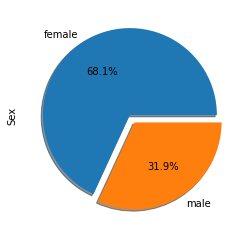

In [44]:
df_male= titanic_train[(titanic_train['Survived'] == 1) & (titanic_train['Sex'] == 'male')]
df_female= titanic_train[(titanic_train['Survived'] == 1) & (titanic_train['Sex'] == 'female')]

# df_male.shape, df_female.shape,

df_survived=pd.concat([df_male, df_female])
df_survived['Sex'].value_counts().plot.pie(explode=[0,0.1], shadow=True, autopct="%1.1f%%")

plt.show()

In [45]:
df_survived['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [46]:
df_survived[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S


#### Visualize based on Survived and Age Column

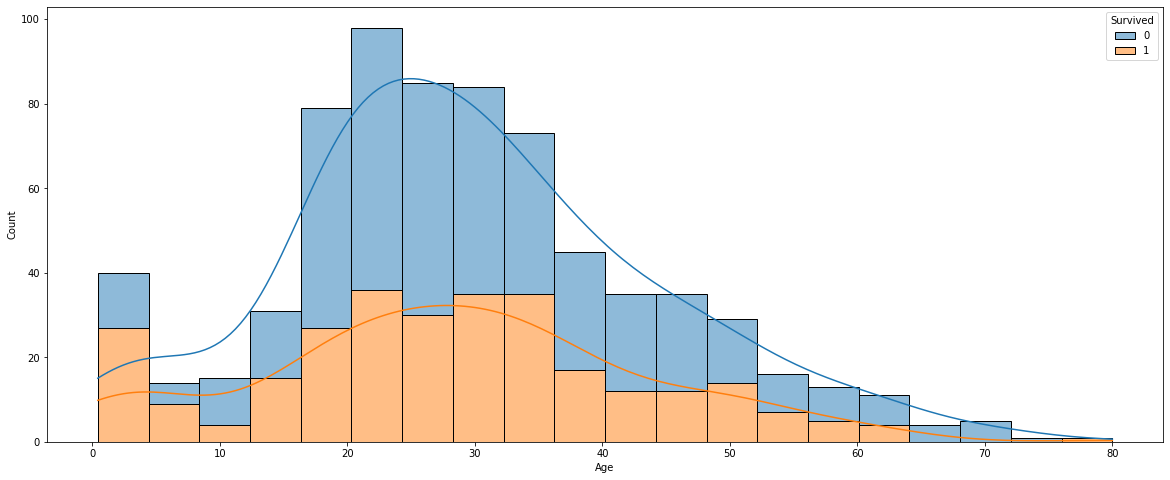

In [47]:
fig7, ax7= plt.subplots(figsize=(20,8))

sns.histplot(data=titanic_train, x="Age", hue="Survived", multiple="stack", kde=True)

plt.show()

In [48]:
print("Kids survived in age ranges: ")
print("Age 0-4:", titanic_train[(titanic_train["Age"] < 4) & (titanic_train["Survived"] == 1)].shape[0])
print("Age 4-7:", titanic_train[(titanic_train["Age"] >= 4) & (titanic_train["Age"] < 7) & (titanic_train["Survived"] == 1)].shape[0])
print("Age 7-10:", titanic_train[(titanic_train["Age"] >= 7) & (titanic_train["Age"] <= 10) & (titanic_train["Survived"] == 1)].shape[0])

print("\nKids NOT survived in age ranges: ")
print("Age 0-4:", titanic_train[(titanic_train["Age"] < 4) & (titanic_train["Survived"] == 0)].shape[0])
print("Age 4-7:", titanic_train[(titanic_train["Age"] >= 4) & (titanic_train["Age"] < 7) & (titanic_train["Survived"] == 0)].shape[0])
print("Age 7-10:", titanic_train[(titanic_train["Age"] >= 7) & (titanic_train["Age"] <= 10) & (titanic_train["Survived"] == 0)].shape[0])

Kids survived in age ranges: 
Age 0-4: 20
Age 4-7: 13
Age 7-10: 5

Kids NOT survived in age ranges: 
Age 0-4: 10
Age 4-7: 4
Age 7-10: 12


In [49]:
correlation_matrix= titanic_train.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


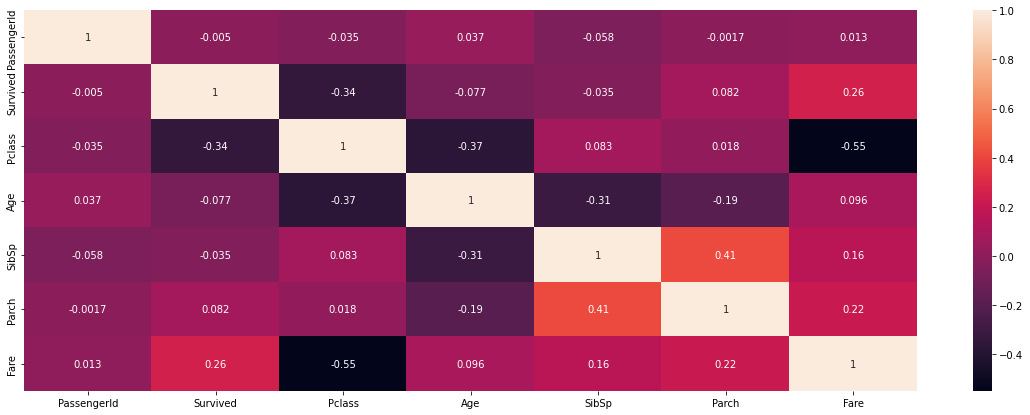

In [50]:
fig, ax= plt.subplots(figsize=(20,7))

dataplot=sns.heatmap(data=correlation_matrix, annot=True, ax=ax)
plt.show()

### Preparing the data

In [51]:
X= titanic_train.drop('Survived', axis=1)
y= titanic_train['Survived'].copy()

In [52]:
X.shape, y.shape

((891, 11), (891,))

In [53]:
X[:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [55]:
# Custom transformer to sample only the useful attributes
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attrs):
        self.attrs = attrs
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attrs].values

In [56]:
num_attrs = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
cat_attrs = ["Sex", "Embarked"]

In [57]:
# Custom transformer to add Parch and SibSp as FamSize
sibsp_ix, parch_ix = 2, 3

class AttribAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        famSize = X[:, sibsp_ix] + X[:, parch_ix] + 1
        return np.c_[X, famSize]

In [58]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attrs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attrib_adder", AttribAdder())
])

In [59]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ("selector", DataFrameSelector(cat_attrs)),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("label_binarize", OneHotEncoder(sparse=False))
])

In [60]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion([
    ("num", num_pipeline),
    ("cat", cat_pipeline)
])

# Use fit transfrom on full pipeline
titanic_prepared = full_pipeline.fit_transform(X)
titanic_prepared_df = pd.DataFrame(titanic_prepared, columns=[
    "Pclass", "Age", "SibSp", "Parch", "Fare", "FamSize", "Female", "Male", "C", "Q", "S"
])
titanic_prepared_df

,Pclass,Age,SibSp,Parch,Fare,FamSize,Female,Male,C,Q,S
0,3.0,22.0,1.0,0.0,7.2500,2.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,2.0,1.0,0.0,1.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,2.0,1.0,0.0,0.0,0.0,1.0
4,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,27.0,0.0,0.0,13.0000,1.0,0.0,1.0,0.0,0.0,1.0
887,1.0,19.0,0.0,0.0,30.0000,1.0,1.0,0.0,0.0,0.0,1.0
888,3.0,28.0,1.0,2.0,23.4500,4.0,1.0,0.0,0.0,0.0,1.0
889,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,1.0,1.0,0.0,0.0



Classification Report for SVC():
              precision    recall  f1-score   support

           0       0.67      0.91      0.77       549
           1       0.66      0.29      0.41       342

    accuracy                           0.67       891
   macro avg       0.67      0.60      0.59       891
weighted avg       0.67      0.67      0.63       891


Classification Report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       549
           1       0.75      0.73      0.74       342

    accuracy                           0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891


Classification Report for KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       549
           1       0.63      0.57      0.60       342

    accuracy                           0.71 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Classification Report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.69      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.79      0.79      0.79       891


Classification Report for LinearSVC():
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       549
           1       0.73      0.56      0.63       342

    accuracy                           0.75       891
   macro avg       0.74      0.71      0.72       891
weighted avg       0.75      0.75      0.74       891


Classification Report for GaussianNB():


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.83      0.83      0.83       549
           1       0.72      0.72      0.72       342

    accuracy                           0.79       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.79      0.79      0.79       891


Classification Report for Perceptron():
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       549
           1       0.53      0.39      0.45       342

    accuracy                           0.63       891
   macro avg       0.60      0.59      0.59       891
weighted avg       0.62      0.63      0.62       891


Classification Report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       549
           1       0.73      0.71      0.72       342

    accuracy                           0.79       891
   macro avg       0.77      0.77 

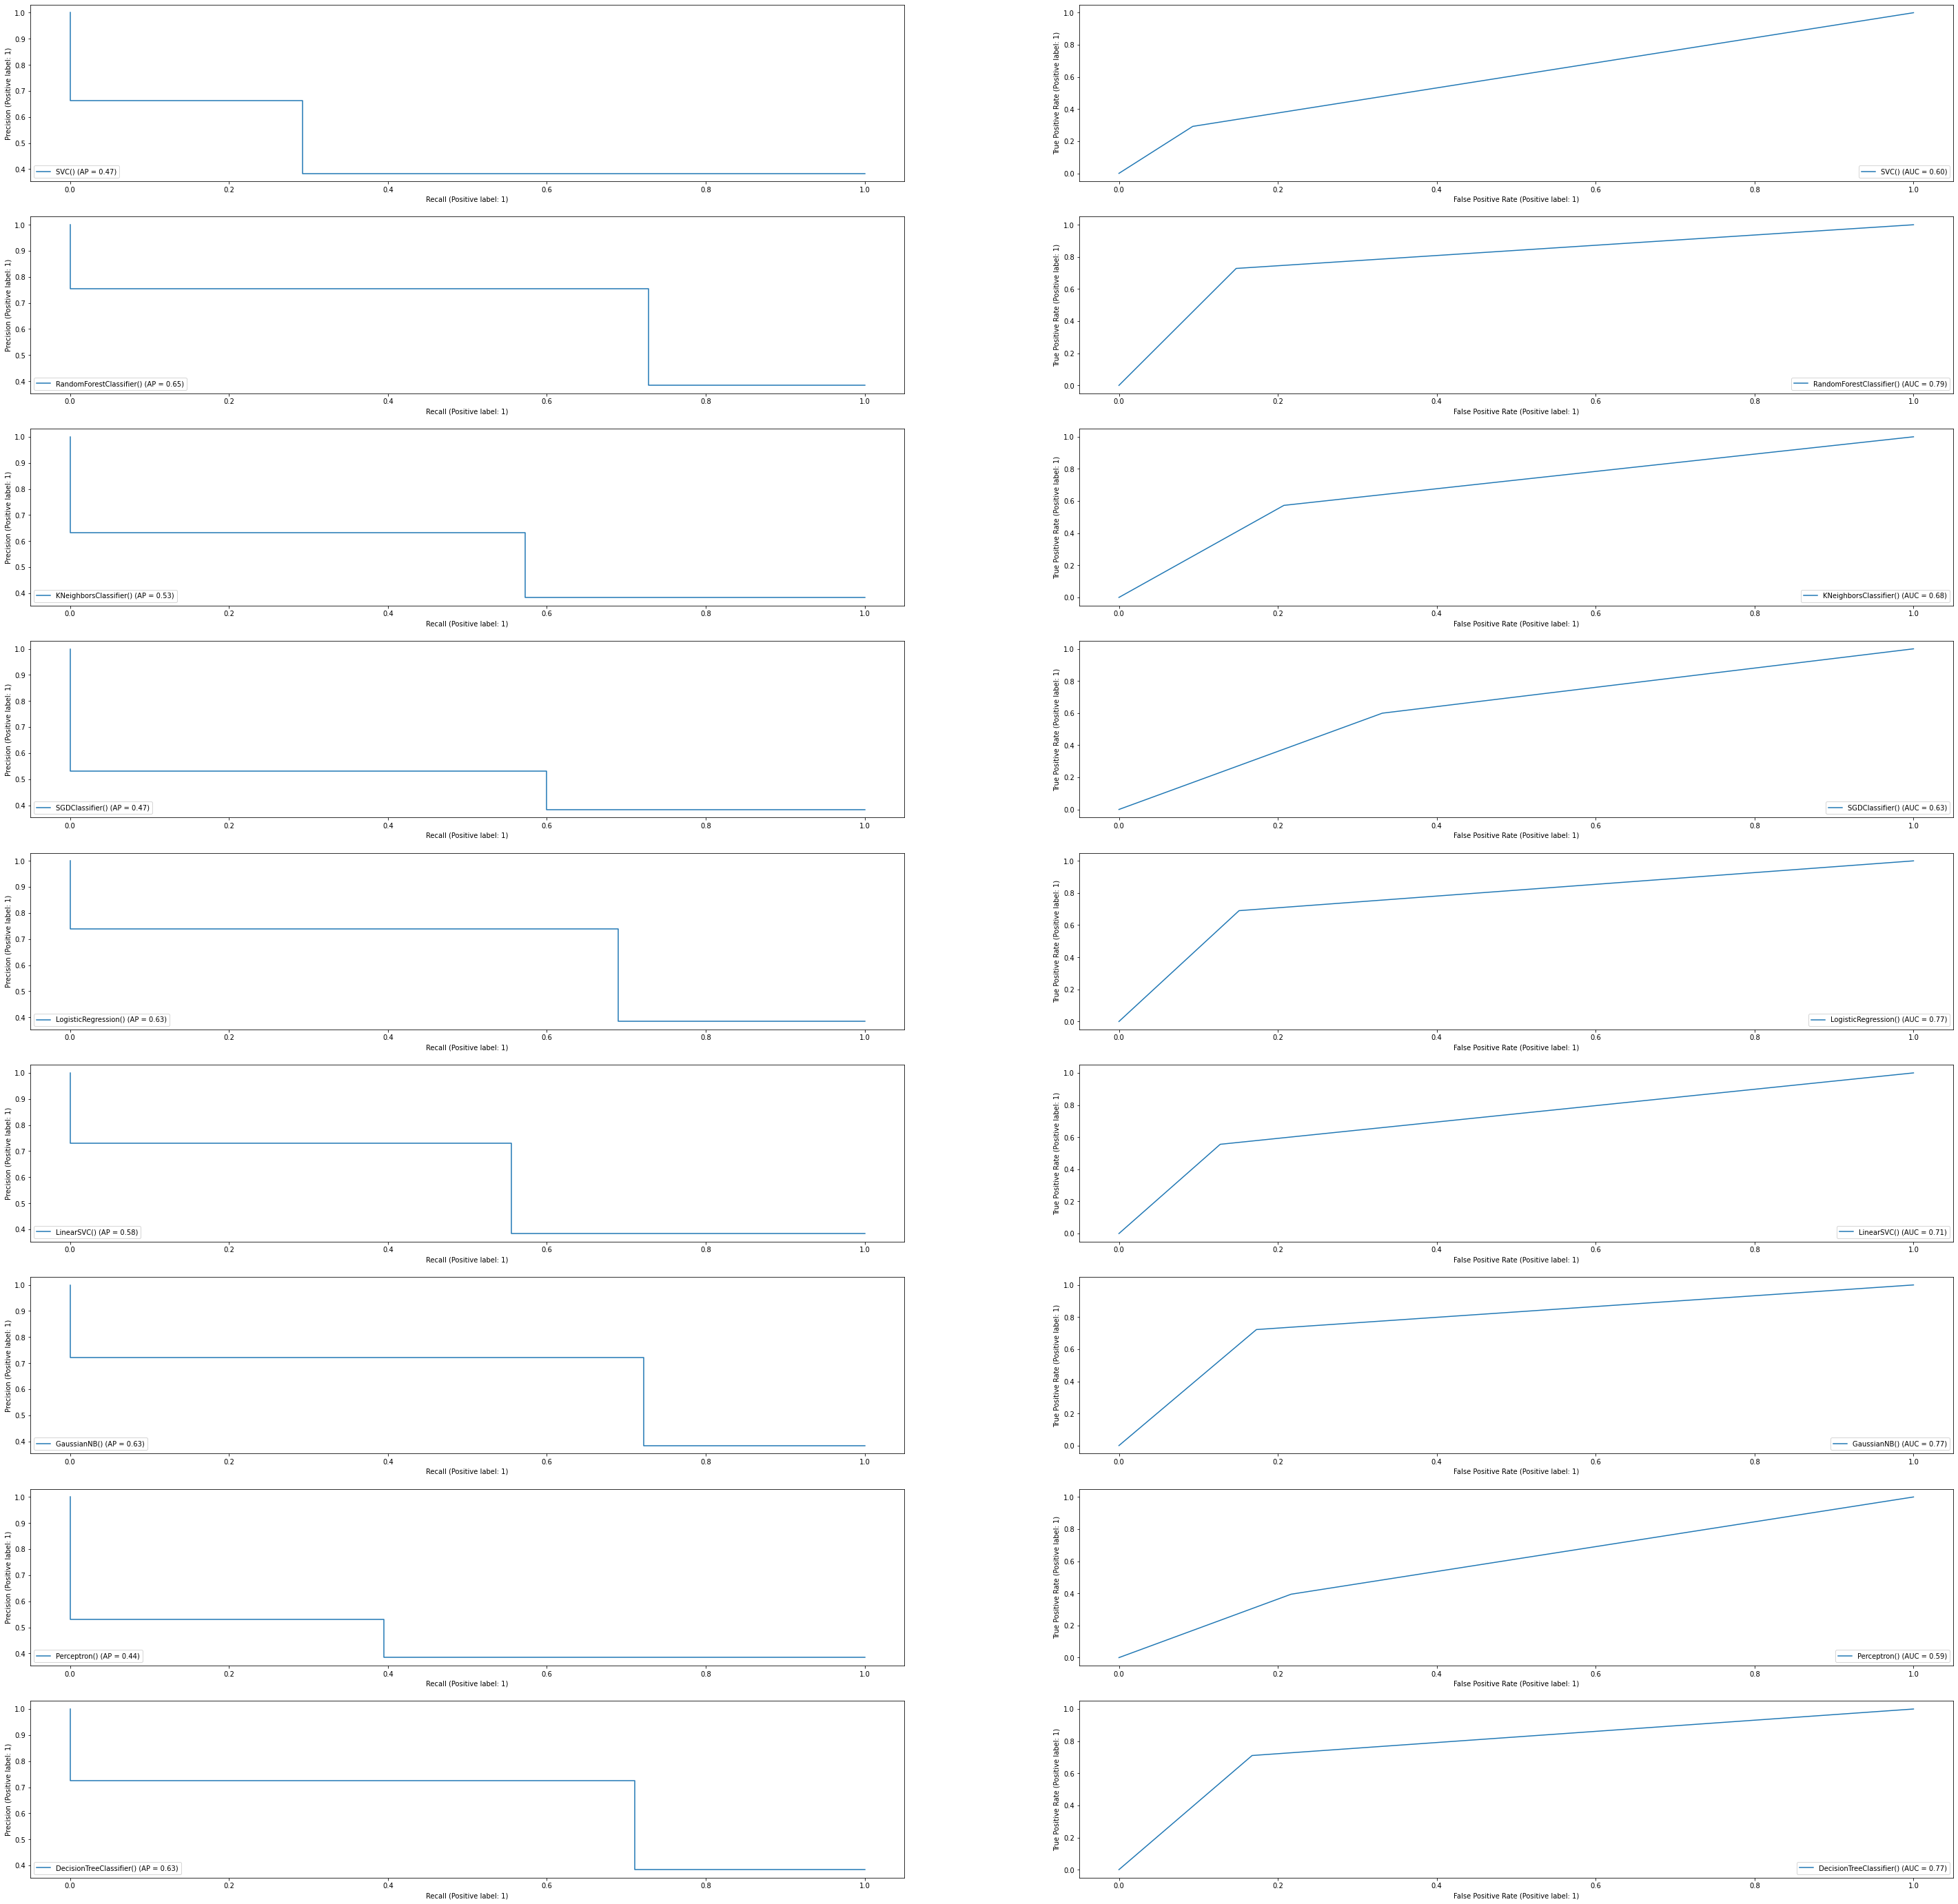

In [61]:
estimators = [SVC(), RandomForestClassifier(), KNeighborsClassifier(), SGDClassifier(), LogisticRegression(), LinearSVC(),GaussianNB(), Perceptron(), DecisionTreeClassifier()]
fig, ax = plt.subplots(len(estimators), 2, figsize=(50, 50))

def run_compare(estis, cv=3):
    for esti_ix, esti in enumerate(estis):
        esti_preds = cross_val_predict(esti, titanic_prepared, y, cv=cv)
        
        esti_pr_disp = PrecisionRecallDisplay.from_predictions(y,
                                                               esti_preds, ax=ax[esti_ix][0], name=esti)
        esti_roc_disp = RocCurveDisplay.from_predictions(y,
                                                         esti_preds, ax=ax[esti_ix][1], name=esti)
        
        print(f"\nClassification Report for {esti}:")
        print(classification_report(y, esti_preds))

# Run
run_compare(estimators, cv=5)
plt.show()


> It is clear that **RandomForestClassifier** is giving the best result which is **0.80**.

>> It is clear that **LogisticRegression** is giving the second best result which is **0.77**.

### Tuning RandomForestClassifier 

In [62]:
# Parameters of random forest classifier
n_estimators = np.linspace(50, 300, int((300 - 50) / 20), dtype=int)
max_depth = [1, 5, 10, 50, 100, 200, 300]
min_samples_split = [2, 4, 6]
max_features = ["sqrt", "log2"]
bootstrap = [True, False]

distributions = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "max_features": max_features,
    "bootstrap": bootstrap
}

#### RandomSearchCV

In [63]:
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier()
random_search_cv = RandomizedSearchCV(
    rfc,
    param_distributions=distributions,
    n_iter=30,
    cv=5,
    n_jobs=4
)

random_search = random_search_cv.fit(titanic_prepared, y)
random_search

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 5, 10, 50, 100, 200,
                                                      300],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': array([ 50,  72,  95, 118, 140, 163, 186, 209, 231, 254, 277, 300])})

In [64]:
rfc_params= random_search.best_estimator_
rfc_params

RandomForestClassifier(max_depth=50, max_features='log2', min_samples_split=6,
                       n_estimators=118)

              precision    recall  f1-score   support

           0    0.83737   0.88160   0.85892       549
           1    0.79233   0.72515   0.75725       342

    accuracy                        0.82155       891
   macro avg    0.81485   0.80337   0.80808       891
weighted avg    0.82008   0.82155   0.81989       891



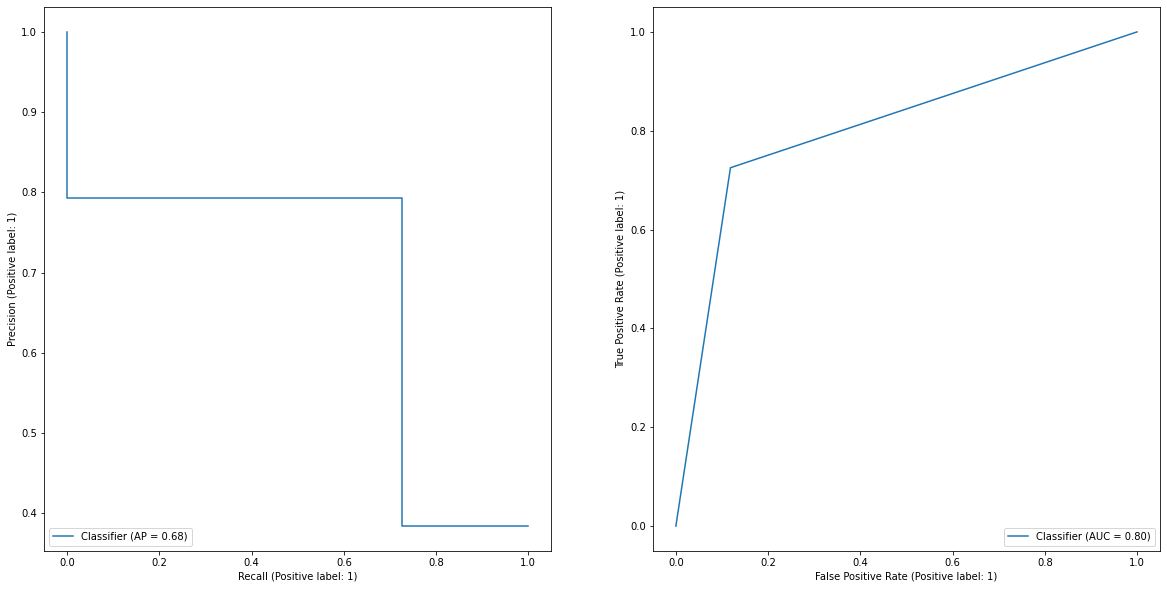

In [65]:
best_preds = cross_val_predict(rfc_params, titanic_prepared, y, cv=5)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
PrecisionRecallDisplay.from_predictions(y, best_preds, ax=ax[0])
RocCurveDisplay.from_predictions(y, best_preds, ax=ax[1])

print(classification_report(y, best_preds, digits=5))
plt.show()

#### GridSearchCV

In [66]:
from sklearn.model_selection import GridSearchCV

gsc= RandomForestClassifier()

grid_search_cv= GridSearchCV(
    gsc,
    param_grid= distributions,
    cv=5,
    n_jobs=5,

)

grid_search= grid_search_cv.fit(titanic_prepared,y)
grid_search

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 5, 10, 50, 100, 200, 300],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': array([ 50,  72,  95, 118, 140, 163, 186, 209, 231, 254, 277, 300])})

In [67]:
gsc_params= grid_search.best_estimator_
gsc_params

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=6,
                       n_estimators=277)

              precision    recall  f1-score   support

           0    0.83531   0.89617   0.86467       549
           1    0.81126   0.71637   0.76087       342

    accuracy                        0.82716       891
   macro avg    0.82329   0.80627   0.81277       891
weighted avg    0.82608   0.82716   0.82483       891



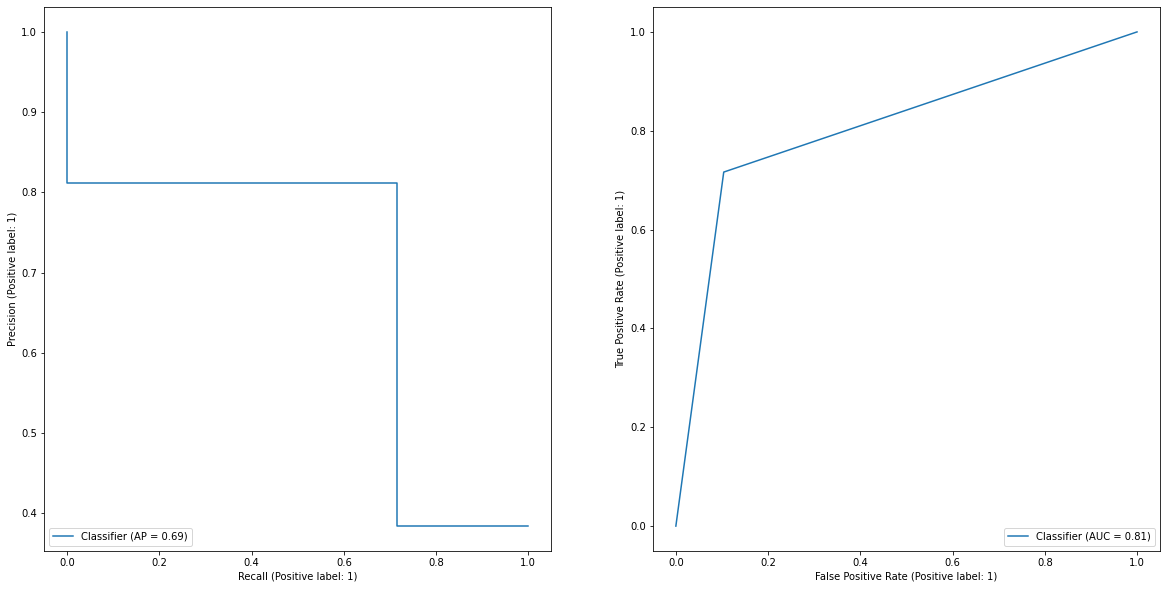

In [68]:
best_preds_grid = cross_val_predict(gsc_params, titanic_prepared, y, cv=5)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
PrecisionRecallDisplay.from_predictions(y, best_preds_grid, ax=ax[0])
RocCurveDisplay.from_predictions(y, best_preds_grid, ax=ax[1])

print(classification_report(y, best_preds_grid, digits=5))
plt.show()

In [69]:
titanic_prepared[:5]

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  2.    ,  0.    ,
         1.    ,  0.    ,  0.    ,  1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  2.    ,  1.    ,
         0.    ,  1.    ,  0.    ,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  1.    ,  1.    ,
         0.    ,  0.    ,  0.    ,  1.    ],
       [ 1.    , 35.    ,  1.    ,  0.    , 53.1   ,  2.    ,  1.    ,
         0.    ,  0.    ,  0.    ,  1.    ],
       [ 3.    , 35.    ,  0.    ,  0.    ,  8.05  ,  1.    ,  0.    ,
         1.    ,  0.    ,  0.    ,  1.    ]])

In [70]:
titanic_prepared_df[:5]

,Pclass,Age,SibSp,Parch,Fare,FamSize,Female,Male,C,Q,S
0,3.0,22.0,1.0,0.0,7.2500,2.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,2.0,1.0,0.0,1.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,2.0,1.0,0.0,0.0,0.0,1.0
4,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,0.0,0.0,1.0


In [71]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(titanic_prepared_df, titanic_prepared, test_size=0.3, random_state=42)

In [72]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((623, 11), (268, 11), (623, 11), (268, 11))

In [73]:
train_X[:5]

,Pclass,Age,SibSp,Parch,Fare,FamSize,Female,Male,C,Q,S
445,1.0,4.0,0.0,2.0,81.8583,3.0,0.0,1.0,0.0,0.0,1.0
650,3.0,28.0,0.0,0.0,7.8958,1.0,0.0,1.0,0.0,0.0,1.0
172,3.0,1.0,1.0,1.0,11.1333,3.0,1.0,0.0,0.0,0.0,1.0
450,2.0,36.0,1.0,2.0,27.7500,4.0,0.0,1.0,0.0,0.0,1.0
314,2.0,43.0,1.0,1.0,26.2500,3.0,0.0,1.0,0.0,0.0,1.0


In [74]:
train_y[:5]

array([[ 1.    ,  4.    ,  0.    ,  2.    , 81.8583,  3.    ,  0.    ,
         1.    ,  0.    ,  0.    ,  1.    ],
       [ 3.    , 28.    ,  0.    ,  0.    ,  7.8958,  1.    ,  0.    ,
         1.    ,  0.    ,  0.    ,  1.    ],
       [ 3.    ,  1.    ,  1.    ,  1.    , 11.1333,  3.    ,  1.    ,
         0.    ,  0.    ,  0.    ,  1.    ],
       [ 2.    , 36.    ,  1.    ,  2.    , 27.75  ,  4.    ,  0.    ,
         1.    ,  0.    ,  0.    ,  1.    ],
       [ 2.    , 43.    ,  1.    ,  1.    , 26.25  ,  3.    ,  0.    ,
         1.    ,  0.    ,  0.    ,  1.    ]])

In [75]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)

In [76]:
X_train_scaled[:5]

array([[-1.63788124, -1.91971935, -0.47416141,  1.99885349,  0.98099823,
         0.5994431 , -0.72077194,  0.72077194, -0.46306042, -0.31117678,
         0.6002183 ],
       [ 0.80326712, -0.0772525 , -0.47416141, -0.47932706, -0.46963364,
        -0.5567583 , -0.72077194,  0.72077194, -0.46306042, -0.31117678,
         0.6002183 ],
       [ 0.80326712, -2.15002771,  0.34868694,  0.75976322, -0.40613632,
         0.5994431 ,  1.38740139, -1.38740139, -0.46306042, -0.31117678,
         0.6002183 ],
       [-0.41730706,  0.53690312,  0.34868694,  1.99885349, -0.08023177,
         1.1775438 , -0.72077194,  0.72077194, -0.46306042, -0.31117678,
         0.6002183 ],
       [-0.41730706,  1.07428929,  0.34868694,  0.75976322, -0.10965138,
         0.5994431 , -0.72077194,  0.72077194, -0.46306042, -0.31117678,
         0.6002183 ]])

In [77]:
# rfc.fit(X_train_scaled, train_y)

### Turning LogisticRegression

In [81]:
# Parameters of Logistic Regression
params = {
    "penalty": ("l1", "l2", "elasticnet"),
    "tol": (0.1, 0.01, 0.001, 0.0001),
    "C": (10.0, 1.0, 0.1, 0.01)
}

In [82]:
gsc= LogisticRegression()

grid_search_cv= GridSearchCV(
    gsc,
    params,
    cv=10,
    verbose=True,
)

grid_search= grid_search_cv.fit(titanic_prepared,y)
grid_search

Fitting 10 folds for each of 48 candidates, totalling 480 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': (10.0, 1.0, 0.1, 0.01),
                         'penalty': ('l1', 'l2', 'elasticnet'),
                         'tol': (0.1, 0.01, 0.001, 0.0001)},
             verbose=True)

In [84]:
grid_search.best_params_

{'C': 0.1, 'penalty': 'l2', 'tol': 0.1}